<a href="https://colab.research.google.com/github/ferreirvanessa/7days0fCode-pandas/blob/main/Analise_Mercado_Aluguel_Top_Bairros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
#importando as bases de dados
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'
dados = pd.read_csv(url, sep = ';')

In [3]:
imoveis_comerciais = ['Conjunto Comercial/Sala',
                      'Prédio Inteiro', 'Loja/Salão',
                      'Galpão/Depósito/Armazém',
                      'Casa Comercial', 'Terreno Padrão',
                      'Loja Shopping/ Ct Comercial',
                      'Box/Garagem', 'Chácara',
                      'Loteamento/Condomínio', 'Sítio',
                      'Pousada/Chalé', 'Hotel', 'Indústria']

# removendo imóveis comerciais
df = dados.query('@imoveis_comerciais not in Tipo')

# selecionando apenas imóveis do tipo apartamento
df = df.query('Tipo == "Apartamento"')

# visualizando a base de dados
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN


In [10]:
dados['Quartos'].mean()

np.float64(1.7713895631067962)

In [11]:
dados['Bairro'].nunique()

162

In [12]:
# Adicione .sort_values(ascending=False)
media_por_bairro_ordenada = df.groupby('Bairro')['Valor'].mean().sort_values(ascending=False)

print(media_por_bairro_ordenada)

Bairro
Joá                       15500.000000
Arpoador                  12429.769231
Cidade Jardim             12000.000000
Ipanema                    9487.205317
Botafogo                   9369.207116
                              ...     
Inhoaíba                    650.000000
Cosmos                      610.000000
Santa Cruz                  590.000000
Paciência                   510.000000
Ricardo de Albuquerque      340.000000
Name: Valor, Length: 149, dtype: float64


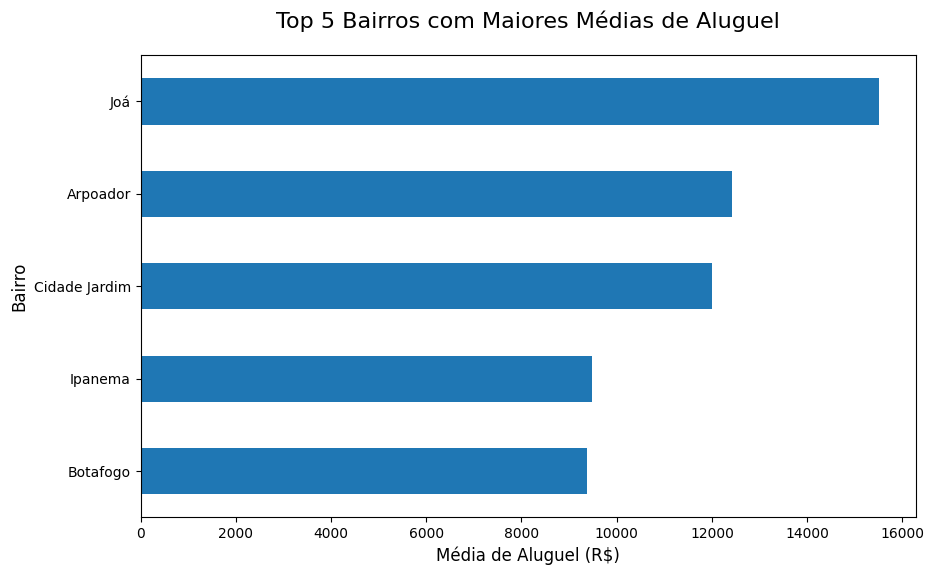

In [23]:
import matplotlib.pyplot as plt
# O Colab renderiza gráficos automaticamente, mas esta linha garante a compatibilidade
%matplotlib inline

# Calcule o ranking novamente (caso não esteja na memória)
ranking_aluguel = df.groupby('Bairro')['Valor'].mean().round(2).sort_values(ascending=False)
# ----------------------------------------------------------------

# 1. Seleciona os 5 bairros com as médias mais elevadas
top_5_bairros = ranking_aluguel.head(5)

# 2. Cria o gráfico de barras horizontais
# Ajustamos o tamanho (figsize) para uma visualização melhor
grafico = top_5_bairros.plot.barh(
    figsize=(10, 6),        # Tamanho do gráfico
    color='#1f77b4'        # Uma cor padrão bonita (azul)
)

# 3. Adiciona título e rótulos para clareza
grafico.set_title('Top 5 Bairros com Maiores Médias de Aluguel', fontsize=16, pad=20)
grafico.set_xlabel('Média de Aluguel (R$)', fontsize=12)
grafico.set_ylabel('Bairro', fontsize=12)

# Inverte o eixo Y para que o bairro mais caro fique no topo (ajuste estético comum)
grafico.invert_yaxis()

# Não precisa do plt.show() no Colab, mas é um bom hábito:
plt.show()